In [1]:
from correctingagent.world import world
from correctingagent.agents.PGMAgent import PGMCorrectingAgent, read_sentence
from correctingagent.agents.teacher import TeacherAgent, FaultyTeacherAgent
from correctingagent.world.world import RandomColoursWorld
from correctingagent.models.pgmmodels import InferenceType
from correctingagent.models.pgmmodels import *
from correctingagent.util.CPD_generation import variable_or_CPD

In [1]:
import pythonpddl.pddl

In [4]:
# The RandomColoursWorld represents a situation where we use the "colours.json" files to identify the rgp value of individual objects
# The problem directory is the full directory information starting from correctingagent/data
# The problem number is simply the number of the problem: problem5.pddl
# The domain file is assumed to be located in correctingagent/data/domain
w = RandomColoursWorld(problem_directory="big_bijection_random_colours/big_bijection_random_colours0", 
                       problem_number=5, 
                       domain_file="blocks-domain.pddl")

teacher = TeacherAgent()

# 
agent = PGMCorrectingAgent(w, teacher=teacher)

# plan =[('put', ['b9', 't0']), ('put', ['b8', 'b9']), 
#        ('put', ['b7', 'b8']), ('put', ['b6', 'b7'])]
    
# for action, args in plan:
#     w.update(action, args)


# agent.get_correction("no, now you cannot put b0 in the tower because you must put green blocks on blue blocks", action, args)
# action, args = ('put', ['b0', 'b7'])
# print()
# print()
# w.update(action, args)
# agent.no_correction(action, args)



# action, args = ('put', ['b6', 'b0'])
# print()
# print()
# w.update(action, args)
# agent.no_correction(action, args)

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl


Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl


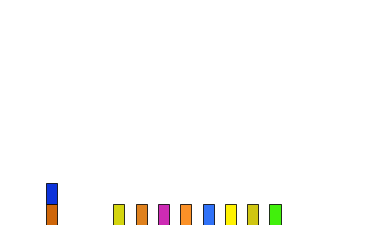

In [18]:
w.reset()

w.update('put', ['b1', 't0'])
w.update('put', ['b0', 'b1'])
w.draw()

In [19]:
teacher.correction(w, 'put', ['b0', 'b1'])

'no, put yellow blocks on orange blocks'

In [20]:
agent.get_correction('no, put yellow blocks on orange blocks', 'put', ['b0', 'b1'])

fix bw? False
bw 0.5
fix bw? False
bw 0.5
no, put yellow blocks on orange blocks
Is the top object yellow?


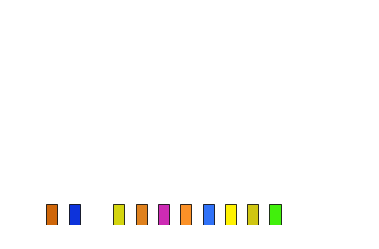

In [21]:
w.draw()

In [22]:
w.update('put', ['b2', 'b1'])

In [23]:
teacher.correction(w, 'put', ['b2', 'b1'])

''

In [24]:
agent.no_correction('put', ['b2', 'b1'])

In [5]:
# This is the basic loop for the agent solving a particular problem
w = RandomColoursWorld(problem_directory="big_bijection_random_colours/big_bijection_random_colours0", 
                       problem_number=5, 
                       domain_file="blocks-domain.pddl")

teacher = TeacherAgent()

agent = PGMCorrectingAgent(w, teacher=teacher, model_config={"fix_bw":True, "bw":0.05})


while w.test_success() is False:
    for a, args, in agent.plan():
        print(a, args)
        w.update(a, args)
        u = teacher.correction(w, a, args)
        if u != '':
            agent.get_correction(u, a, args)
            break
        else:
            agent.no_correction(a, args)

            

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl
blocks-domain.pddl False
planning 0.01213526725769043 time
put ['b9', 't0']
put ['b8', 'b9']
fix bw? True
bw 0.05
fix bw? True
bw 0.05
no, put yellow blocks on orange blocks
Is the top object yellow?
blocks-domain.pddl False
planning 0.017015457153320312 time
put ['b0', 'b9']
put ['b8', 'b0']
no, put yellow blocks on orange blocks
blocks-domain.pddl False
planning 0.021158456802368164 time
put ['b2', 'b0']
no, put yellow blocks on orange blocks
blocks-domain.pddl False
planning 0.07957124710083008 time
put ['b7', 'b0']
no, put yellow blocks on orange blocks
blocks-domain.pddl False
planning 0.12186551094055176 time
put ['b6', 'b0']
put ['b8', 'b6']
no, put yellow blocks on orange blocks
blocks-domain.pddl False
planning 0.01992940902709961 time
put ['b1', 'b6']
put 

# Working with the world object

In [6]:
w = RandomColoursWorld(problem_directory="big_bijection_random_colours/big_bijection_random_colours0", 
                       problem_number=5, 
                       domain_file="blocks-domain.pddl")


Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl


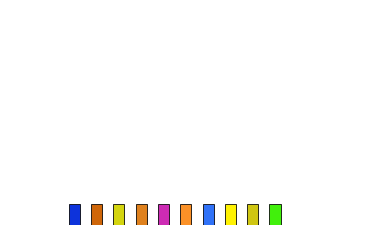

In [7]:
# The world object contains several useful functions for working with the PDDL state
# You can draw the current state:
w.draw()

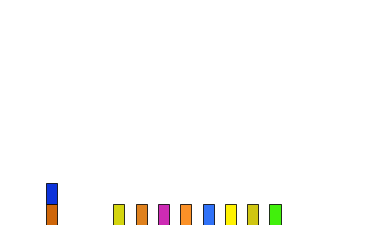

In [8]:
# You can update the state by giving it an action to perform
w.update('put', ['b1', 't0'])
w.update('put', ['b0', 'b1'])
w.draw()

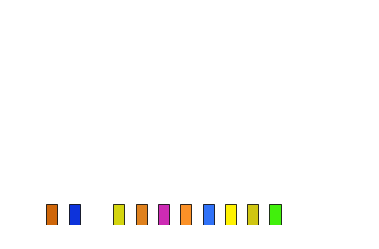

In [9]:
# You can undo previous moves
w.back_track()
w.draw()

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl


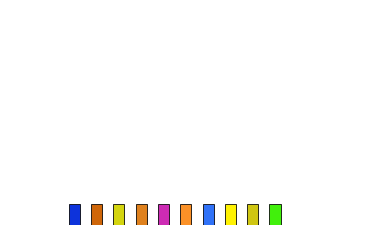

In [11]:
# or simply reset it to the start
w.reset()
w.draw()

In [20]:
w.reset()
# There are ways to check if you've reached the end or if we are in a failure state
print()
print("test if we're done:", w.test_success())
print("test if we've failed:", w.test_failure())
print()
w.update('put', ['b1', 't0'])
w.update('put', ['b0', 'b1'])
print("test if we've failed (we have):", w.test_failure())
print()

# We can even find a correct plan
w.reset()
for a, args, in w.find_plan():
    if a == "reach-goal":
        break
    w.update(a, args)
print()
print("test if we're done (we are):", w.test_success())

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl

test if we're done: False
test if we've failed: False

test if we've failed (we have): True

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl

test if we're done (we are): True


In [25]:
# The agent will interface with the world by "observing" it
observation = w.sense()
print(observation)

Observation(objects=['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 't0'], colours={'b0': array([0.04910942, 0.1991187 , 0.85689553]), 'b1': array([0.81181367, 0.40106563, 0.03668641]), 'b2': array([0.83170222, 0.83470729, 0.05785656]), 'b3': array([0.87351345, 0.50482238, 0.11180392]), 'b4': array([0.80426507, 0.17033074, 0.70488709]), 'b5': array([0.98387948, 0.56746558, 0.15209012]), 'b6': array([0.18654365, 0.44528084, 0.9740397 ]), 'b7': array([0.99938212, 0.94935947, 0.00769112]), 'b8': array([0.81191894, 0.77625833, 0.07216284]), 'b9': array([0.25413727, 0.94219347, 0.04657181])}, state=<correctingagent.pddl.pddl_functions.PDDLState object at 0x7f540bb98090>)


In [34]:
# The observation tells us what objects are in the tower:
print("objects:", " ".join(observation.objects))
# it also tells us the RGB value for each object (other than t0 which is a tower location)
print()
print("object colours:")
for o, rgb in observation.colours.items():
    print(o, rgb)
print()
# you can also observe the RGB of a specific object directly:
print("observing colour of a specific object: ", "b1", w.observe_object("b1"))
print()
# Finally, we have an object representing the current state of the world:
print("PDDL state", observation.state)

objects: b0 b1 b2 b3 b4 b5 b6 b7 b8 b9 t0

object colours:
b0 [0.04910942 0.1991187  0.85689553]
b1 [0.81181367 0.40106563 0.03668641]
b2 [0.83170222 0.83470729 0.05785656]
b3 [0.87351345 0.50482238 0.11180392]
b4 [0.80426507 0.17033074 0.70488709]
b5 [0.98387948 0.56746558 0.15209012]
b6 [0.18654365 0.44528084 0.9740397 ]
b7 [0.99938212 0.94935947 0.00769112]
b8 [0.81191894 0.77625833 0.07216284]
b9 [0.25413727 0.94219347 0.04657181]

observing colour of a specific object:  b1 [0.81181367 0.40106563 0.03668641]

PDDL state <correctingagent.pddl.pddl_functions.PDDLState object at 0x7f540bb98090>


In [36]:
# The state object is also useful 
state = observation.state
# Note that the observed state does not include the colour name of any of the objects!

print("The state does not contain any of the colour terms!")
state.print()

The state does not contain any of the colour terms!
(arm-empty )
(clear b9)
(in-tower t0)
(on b0 t0)
(in-tower b0)
(on b1 b0)
(in-tower b1)
(on b2 b1)
(in-tower b2)
(on b3 b2)
(in-tower b3)
(on b7 b3)
(in-tower b7)
(on b4 b7)
(in-tower b4)
(on b5 b4)
(in-tower b5)
(on b8 b5)
(in-tower b8)
(on b6 b8)
(in-tower b6)
(on b9 b6)
(in-tower b9)


In [39]:
# You can check whether particular predicates hold

print("is b9 clear?", state.predicate_holds("clear", ["b9"]))
print("is b9 on b1?", state.predicate_holds("on", ["b9", "b1"]))
print("is b9 on b6?", state.predicate_holds("on", ["b9", "b6"]))
print("is b8 in a tower?", state.predicate_holds('in-tower', ['b8']))

is b9 clear? True
is b9 on b1? False
is b9 on b6? True
is b8 in a tower? True


# Working with the agent

In [40]:
from correctingagent.models.prob_model import KDEColourModel

In [81]:
# The goal is for us to learn the goal and to learn to ground colour terms
# As such the grounding model is the core of this and is the part which you would replace in your model
# Simply put the grounding or colour model predicts P(Red(x)|F(x)) or equivalent

# We initialise these models simply with a name and some hyper parameters
# Don't worry about the hyper parameters, they have to do with the size of Gaussians in the Kernel Density Model we use 
yellow_model = KDEColourModel("yellow", fix_bw=True, bw=0.05) 
blue_model = KDEColourModel("blue", fix_bw=True, bw=0.2)


fix bw? True
bw 0.05
fix bw? True
bw 0.2


In [82]:
# There are two things you want to be able to do with these models: Predict P(colour(x)|F(x)) and update the model given new evidence

# First let's get some data
# It's possible to sense the actual state of the world with the true colours, let's do so to actually know what colour each block is
w.reset()
observation = w.sense(obscure=False)
observation.state.print()

Parsing domain /home/mappelgren/Desktop/correcting-agent/data/domain/blocks-domain.pddl
Parsing problem /home/mappelgren/Desktop/correcting-agent/data/big_bijection_random_colours/big_bijection_random_colours0/problem5.pddl
(arm-empty )
(on-table b0)
(clear b0)
(on-table b1)
(clear b1)
(on-table b2)
(clear b2)
(on-table b3)
(clear b3)
(on-table b4)
(clear b4)
(on-table b5)
(clear b5)
(on-table b6)
(clear b6)
(on-table b7)
(clear b7)
(on-table b8)
(clear b8)
(on-table b9)
(clear b9)
(in-tower t0)
(clear t0)
(blue b0)
(orange b1)
(yellow b2)
(orange b3)
(pink b4)
(orange b5)
(blue b6)
(yellow b7)
(yellow b8)
(green b9)


In [83]:
# when initialised the model will simply give probability 0.5 for every colour
print("P(yellow(b2)=1|F(b2))", yellow_model.p(1, observation.colours["b2"]))
print("P(yellow(b2)=0|F(b2))", yellow_model.p(0, observation.colours["b2"]))
print("P(blue(b2)=1|F(b2))", blue_model.p(1, observation.colours["b2"]))

P(yellow(b2)=1|F(b2)) 0.5
P(yellow(b2)=0|F(b2)) 0.5
P(blue(b2)=1|F(b2)) 0.5


In [84]:
# However, we can update the models with relevant data
# b0 is blue and b7 is yellow, let's add these to the appropriate models

yellow_model.update(observation.colours["b7"], 1) # the 1 means we believe with probability 1 that b7 is yellow
blue_model.update(observation.colours["b0"], 1)

# Now the probabilities will have changed to match the updated models
print("P(yellow(b2)=1|F(b2))", yellow_model.p(1, observation.colours["b2"]))
print("P(yellow(b2)=0|F(b2))", yellow_model.p(0, observation.colours["b2"]))
print("P(blue(b2)=1|F(b2))", blue_model.p(1, observation.colours["b2"]))


P(yellow(b2)=1|F(b2)) 0.2073944078338394
P(yellow(b2)=0|F(b2)) 0.7926055921661606
P(blue(b2)=1|F(b2)) 1.0116131977657149e-08


In [85]:
# It looks like the datapoint wasn't super helpful for recognising b2 as being yellow, perhaps we can add another and that might help?
yellow_model.update(observation.colours["b8"], 0.8) # we're not as confident about "b8" being yellow, so we give it a lower weight
print("P(yellow(b2)=1|F(b2))", yellow_model.p(1, observation.colours["b2"]))
print("P(yellow(b2)=0|F(b2))", yellow_model.p(0, observation.colours["b2"]))
# Now we can recognise b2 as being yellow! 


P(yellow(b2)=1|F(b2)) 0.9825975657010302
P(yellow(b2)=0|F(b2)) 0.017402434298969767
